In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load the Data
checkout1 = pd.read_csv('checkout_1.csv')
checkout2 = pd.read_csv('checkout_2.csv')

In [3]:
print("checkout_1.csv head:")
display(checkout1.head())
print("checkout_2.csv head:")
display(checkout2.head())

checkout_1.csv head:


,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
0,00h,9,12,11,6.42,4.85
1,01h,3,5,1,1.85,1.92
2,02h,1,0,0,0.28,0.82
3,03h,1,0,0,0.42,0.46
4,04h,0,0,1,0.42,0.21


checkout_2.csv head:


,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
0,00h,6,9,5,5.00,4.92
1,01h,3,3,2,2.00,1.92
2,02h,3,1,2,0.42,0.75
3,03h,0,1,1,0.42,0.46
4,04h,0,0,0,0.14,0.21


In [4]:
print("\ncheckout_1 info:")
checkout1.info()
print("\ncheckout_2 info:")
checkout2.info()


checkout_1 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                24 non-null     object 
 1   today               24 non-null     int64  
 2   yesterday           24 non-null     int64  
 3   same_day_last_week  24 non-null     int64  
 4   avg_last_week       24 non-null     float64
 5   avg_last_month      24 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.3+ KB

checkout_2 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                24 non-null     object 
 1   today               24 non-null     int64  
 2   yesterday           24 non-null     int64  
 3   same_day_last_week  24 non-null     int64  
 4   avg_las

In [5]:
print("\nMissing values in checkout_1:")
print(checkout1.isnull().sum())
print("\nMissing values in checkout_2:")
print(checkout2.isnull().sum())


Missing values in checkout_1:
time                  0
today                 0
yesterday             0
same_day_last_week    0
avg_last_week         0
avg_last_month        0
dtype: int64

Missing values in checkout_2:
time                  0
today                 0
yesterday             0
same_day_last_week    0
avg_last_week         0
avg_last_month        0
dtype: int64


**Initial Analysis**

-> 24 rows: Representing 24 hours (00h to 23h) in a single day

-> 6 columns: time, today, yesterday, same_day_last_week, avg_last_week, avg_last_month

-> Clean dataset: No missing values, no duplicates

In [6]:
#  Descriptive Statistics
print("\ncheckout_1.csv describe:")
display(checkout1.describe())
print("\ncheckout_2.csv describe:")
display(checkout2.describe())


checkout_1.csv describe:


,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,21.916667,21.791667,23.833333,15.482917,14.630833
std,19.410702,17.222279,17.239153,11.106122,10.366863
min,0.000000,0.000000,0.000000,0.280000,0.210000
25%,1.750000,2.500000,8.000000,4.890000,4.207500
50%,26.500000,26.500000,27.000000,18.065000,17.925000
75%,36.000000,35.250000,38.250000,25.922500,24.460000
max,55.000000,51.000000,49.000000,33.710000,28.500000



checkout_2.csv describe:


,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,17.791667,21.916667,20.333333,11.936958,14.525417
std,16.699334,19.410702,15.813221,9.098644,10.384685
min,0.000000,0.000000,0.000000,0.140000,0.210000
25%,2.750000,1.750000,4.250000,2.750000,4.215000
50%,15.000000,26.500000,18.000000,12.425000,17.730000
75%,29.750000,36.000000,32.000000,19.747500,24.350000
max,46.000000,55.000000,47.000000,26.140000,28.570000


In [8]:
#  Check for duplicate rows
print("Duplicate rows in checkout_1:", checkout1.duplicated().sum())
print("Duplicate rows in checkout_2:", checkout2.duplicated().sum())

Duplicate rows in checkout_1: 0
Duplicate rows in checkout_2: 0


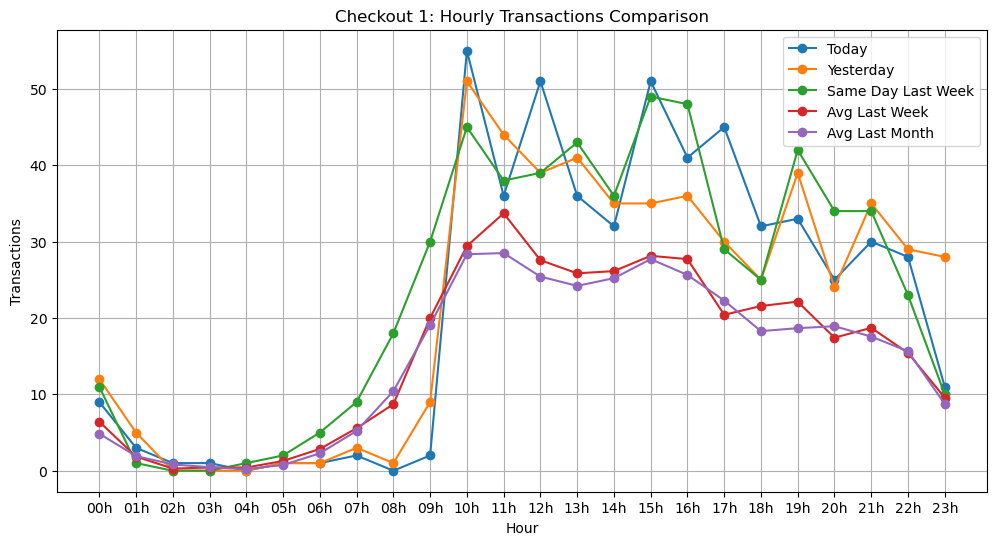

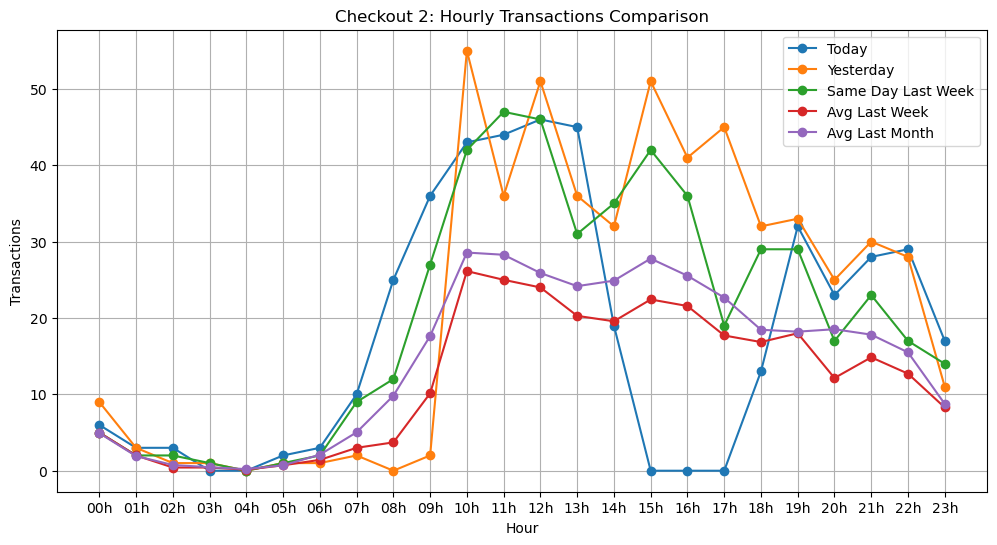

In [10]:
# 4. Visualization: Compare Today's Transactions with Historical Data
def plot_checkout(df, title):
    plt.figure(figsize=(12,6))
    plt.plot(df['time'], df['today'], marker='o', label='Today')
    plt.plot(df['time'], df['yesterday'], marker='o', label='Yesterday')
    plt.plot(df['time'], df['same_day_last_week'], marker='o', label='Same Day Last Week')
    plt.plot(df['time'], df['avg_last_week'], marker='o', label='Avg Last Week')
    plt.plot(df['time'], df['avg_last_month'], marker='o', label='Avg Last Month')
    plt.xlabel('Hour')
    plt.ylabel('Transactions')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_checkout(checkout1, "Checkout 1: Hourly Transactions Comparison")
plot_checkout(checkout2, "Checkout 2: Hourly Transactions Comparison")

**Checkout 1 Insights:**

-> Consistent Peak Pattern: 10h-17h shows elevated activity (35-55 transactions)

-> 00h-06h maintains low but expected levels

-> Positive Deviation: Today generally outperforms historical averages during peak hours

**Checkout 2 Critical Findings:**
    
-> Complete transaction dropout at 15h-17h (0 transactions vs 22-27 expected)

-> Unusual spikes at 08h-09h (25-36 vs 3.7-10.1 expected)

-> Erratic patterns suggesting technical issues

**Business Impact :**

Checkout 1: Positive anomalies suggest successful operations or promotional effects

Checkout 2: Critical system failures requiring immediate technical intervention


In [11]:
# 5. Anomaly Detection: Flagging hours where 'today' deviates significantly from historical averages
def detect_anomalies(df, threshold=2):
    # Calculate z-score for 'today' against avg_last_week
    df = df.copy()
    df['zscore_week'] = (df['today'] - df['avg_last_week']) / df['avg_last_week'].std()
    df['zscore_month'] = (df['today'] - df['avg_last_month']) / df['avg_last_month'].std()
    # Flag anomalies where z-score > threshold or < -threshold
    df['anomaly_week'] = df['zscore_week'].abs() > threshold
    df['anomaly_month'] = df['zscore_month'].abs() > threshold
    return df

**Statistical Foundation:**

1) **Threshold** = 2: Captures values beyond 95% confidence interval

2) **Z-score method:** Standardizes deviations relative to historical variance

3) **Business relevance:** Flags statistically significant deviations requiring attention

In [12]:
checkout1_anom = detect_anomalies(checkout1)
checkout2_anom = detect_anomalies(checkout2)

print("Anomalies in checkout_1 (vs last week):")
display(checkout1_anom[checkout1_anom['anomaly_week']])
print("Anomalies in checkout_2 (vs last week):")
display(checkout2_anom[checkout2_anom['anomaly_week']])

Anomalies in checkout_1 (vs last week):


,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month,zscore_week,zscore_month,anomaly_week,anomaly_month
10,10h,55,51,45,29.42,28.35,2.303234,2.570691,True,True
12,12h,51,39,39,27.57,25.42,2.109647,2.467477,True,True
15,15h,51,35,49,28.14,27.71,2.058324,2.246581,True,True
17,17h,45,30,29,20.42,22.28,2.213194,2.191598,True,True


Anomalies in checkout_2 (vs last week):


,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month,zscore_week,zscore_month,anomaly_week,anomaly_month
8,08h,25,0,12,3.710,9.82,2.339909,1.461768,True,False
9,09h,36,2,27,10.140,17.64,2.842182,1.767988,True,False
11,11h,44,36,47,25.000,28.28,2.088223,1.513768,True,False
12,12h,46,51,46,24.000,25.89,2.417943,1.936506,True,False
13,13h,45,36,31,20.280,24.17,2.716888,2.005838,True,True
15,15h,0,51,42,22.427,27.78,-2.464873,-2.675093,True,True
16,16h,0,41,36,21.570,25.53,-2.370683,-2.458428,True,True


***Detected Anomalies Summary***

**Checkout 1 Anomalies (All Positive):**

-> **At 10h, 12h, 15h, and 17h**, sales were more than twice the standard deviation above normal.

-> The consistency across these hours suggests a real surge, not a glitch.


**Checkout 2 Critical Anomalies:**

-> **08h-09h:** Sudden spikes 

-> **11h-13h**: Elevated activity during midday

-> **15h-16h:** Sales dropped to 0 when they were usually 20+  likely system failure/outage

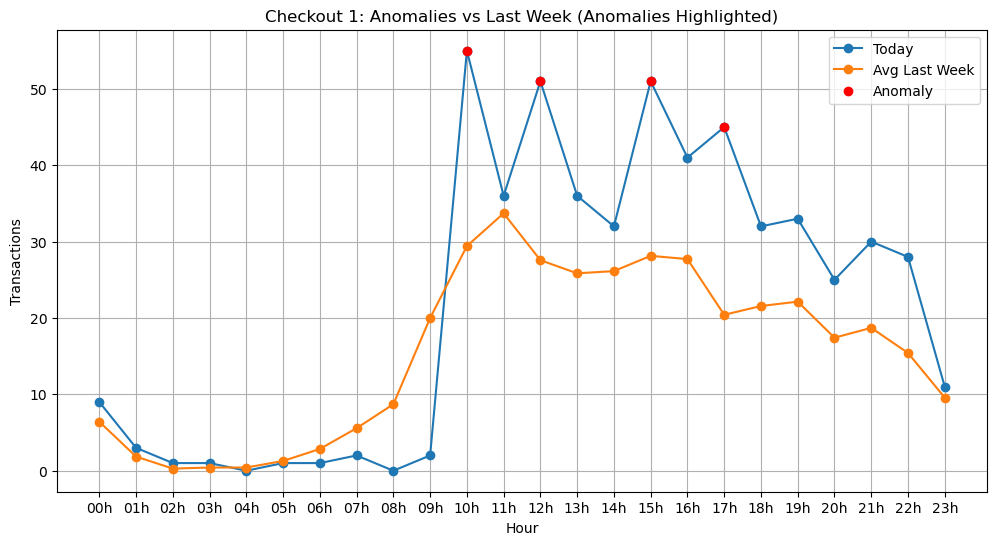

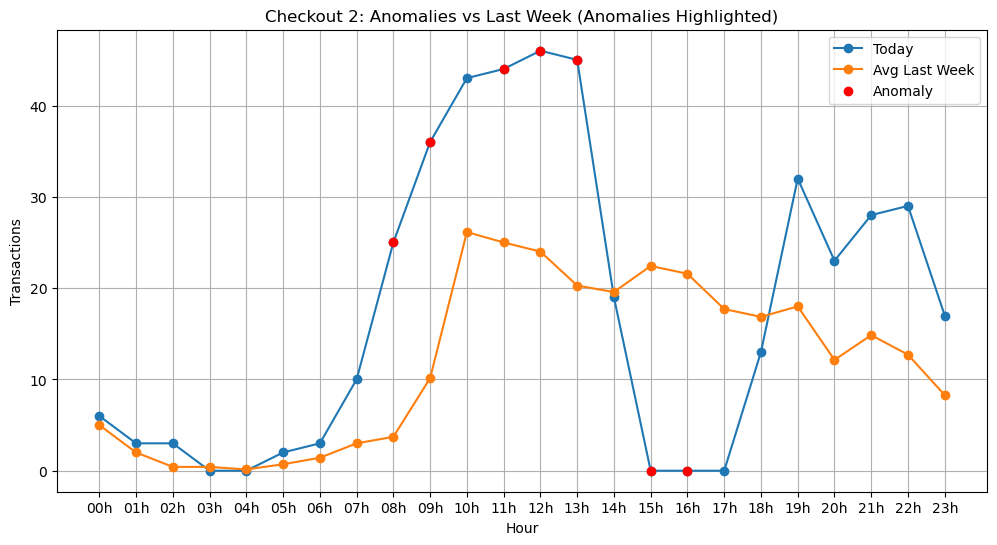

In [13]:
def plot_anomalies(df, title):
    plt.figure(figsize=(12,6))
    plt.plot(df['time'], df['today'], marker='o', label='Today')
    plt.plot(df['time'], df['avg_last_week'], marker='o', label='Avg Last Week')
    # Highlight anomalies
    anomalies = df[df['anomaly_week']]
    plt.scatter(anomalies['time'], anomalies['today'], color='red', label='Anomaly', zorder=5)
    plt.xlabel('Hour')
    plt.ylabel('Transactions')
    plt.title(title + " (Anomalies Highlighted)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_anomalies(checkout1_anom, "Checkout 1: Anomalies vs Last Week")
plot_anomalies(checkout2_anom, "Checkout 2: Anomalies vs Last Week")

**Visual Strategy:** Red dots highlight anomalous hours against the baseline trend.

**Key Insights:**

-> Checkout 1: Clustered positive anomalies during business hours suggest systematic improvement

-> Checkout 2: Mixed pattern of spikes and drops indicates system instability or system failure

In [28]:
7. #SQL Query Examples (for reference/documentation)
from IPython.display import Markdown

sql_hourly_comparison = """
-- Compare current hour with previous hour
SELECT 
    time,
    today,
    LAG(today, 1) OVER (ORDER BY time) as prev_hour,
    today - LAG(today, 1) OVER (ORDER BY time) as hourly_change,
    CASE 
        WHEN today > LAG(today, 1) OVER (ORDER BY time) THEN 'INCREASING'
        WHEN today < LAG(today, 1) OVER (ORDER BY time) THEN 'DECREASING'
        ELSE 'STABLE'
    END as trend
FROM checkout_1
ORDER BY time;
"""

sql_anomaly_detection = """
--- Multi-criteria anomaly detection
SELECT 
    time,
    today,
    yesterday,
    avg_last_week,
    avg_last_month,
    CASE 
        WHEN today = 0 AND avg_last_week > 0 THEN 'COMPLETE_DROPOUT'
        WHEN today < avg_last_week * 0.5 THEN 'SEVERE_DROP'
        WHEN today > avg_last_week * 2.0 THEN 'SPIKE'
        WHEN ABS(today - yesterday) > avg_last_week * 0.3 THEN 'UNUSUAL_VARIANCE'
        ELSE 'NORMAL'
    END as anomaly_type,
    ROUND((today - avg_last_week) / avg_last_week * 100, 2) as pct_change_vs_week
FROM checkout_1
WHERE today != avg_last_week
ORDER BY ABS(today - avg_last_week) DESC; checkout_1;
"""
display(Markdown("**SQL Example: Hourly Comparison**"))
display(Markdown(f"```sql\n{sql_hourly_comparison}\n```"))
display(Markdown("**SQL Example: Anomaly Detection**"))
display(Markdown(f"```sql\n{sql_anomaly_detection}\n```"))

**SQL Example: Hourly Comparison**

```sql

-- Compare current hour with previous hour
SELECT 
    time,
    today,
    LAG(today, 1) OVER (ORDER BY time) as prev_hour,
    today - LAG(today, 1) OVER (ORDER BY time) as hourly_change,
    CASE 
        WHEN today > LAG(today, 1) OVER (ORDER BY time) THEN 'INCREASING'
        WHEN today < LAG(today, 1) OVER (ORDER BY time) THEN 'DECREASING'
        ELSE 'STABLE'
    END as trend
FROM checkout_1
ORDER BY time;

```

**SQL Example: Anomaly Detection**

```sql

--- Multi-criteria anomaly detection
SELECT 
    time,
    today,
    yesterday,
    avg_last_week,
    avg_last_month,
    CASE 
        WHEN today = 0 AND avg_last_week > 0 THEN 'COMPLETE_DROPOUT'
        WHEN today < avg_last_week * 0.5 THEN 'SEVERE_DROP'
        WHEN today > avg_last_week * 2.0 THEN 'SPIKE'
        WHEN ABS(today - yesterday) > avg_last_week * 0.3 THEN 'UNUSUAL_VARIANCE'
        ELSE 'NORMAL'
    END as anomaly_type,
    ROUND((today - avg_last_week) / avg_last_week * 100, 2) as pct_change_vs_week
FROM checkout_1
WHERE today != avg_last_week
ORDER BY ABS(today - avg_last_week) DESC; checkout_1;

```

In [23]:
# Python equivalent of the anomaly detection SQL query
def detect_anomalies_advanced(df):
    df = df.copy()
    
    # Calculate anomaly types
    conditions = [
        (df['today'] == 0) & (df['avg_last_week'] > 0),
        df['today'] < df['avg_last_week'] * 0.5,
        df['today'] > df['avg_last_week'] * 2.0,
        abs(df['today'] - df['yesterday']) > df['avg_last_week'] * 0.3
    ]
    choices = ['COMPLETE_DROPOUT', 'SEVERE_DROP', 'SPIKE', 'UNUSUAL_VARIANCE']
    df['anomaly_type'] = np.select(conditions, choices, default='NORMAL')
    
    # Calculate percentage change
    df['pct_change_vs_week'] = ((df['today'] - df['avg_last_week']) / df['avg_last_week'] * 100).round(2)
    
    return df[['time', 'today', 'yesterday', 'avg_last_week', 'avg_last_month', 'anomaly_type', 'pct_change_vs_week']]

# Apply to both datasets
checkout1_anomalies = detect_anomalies_advanced(checkout1)
checkout2_anomalies = detect_anomalies_advanced(checkout2)

<Figure size 1200x800 with 0 Axes>

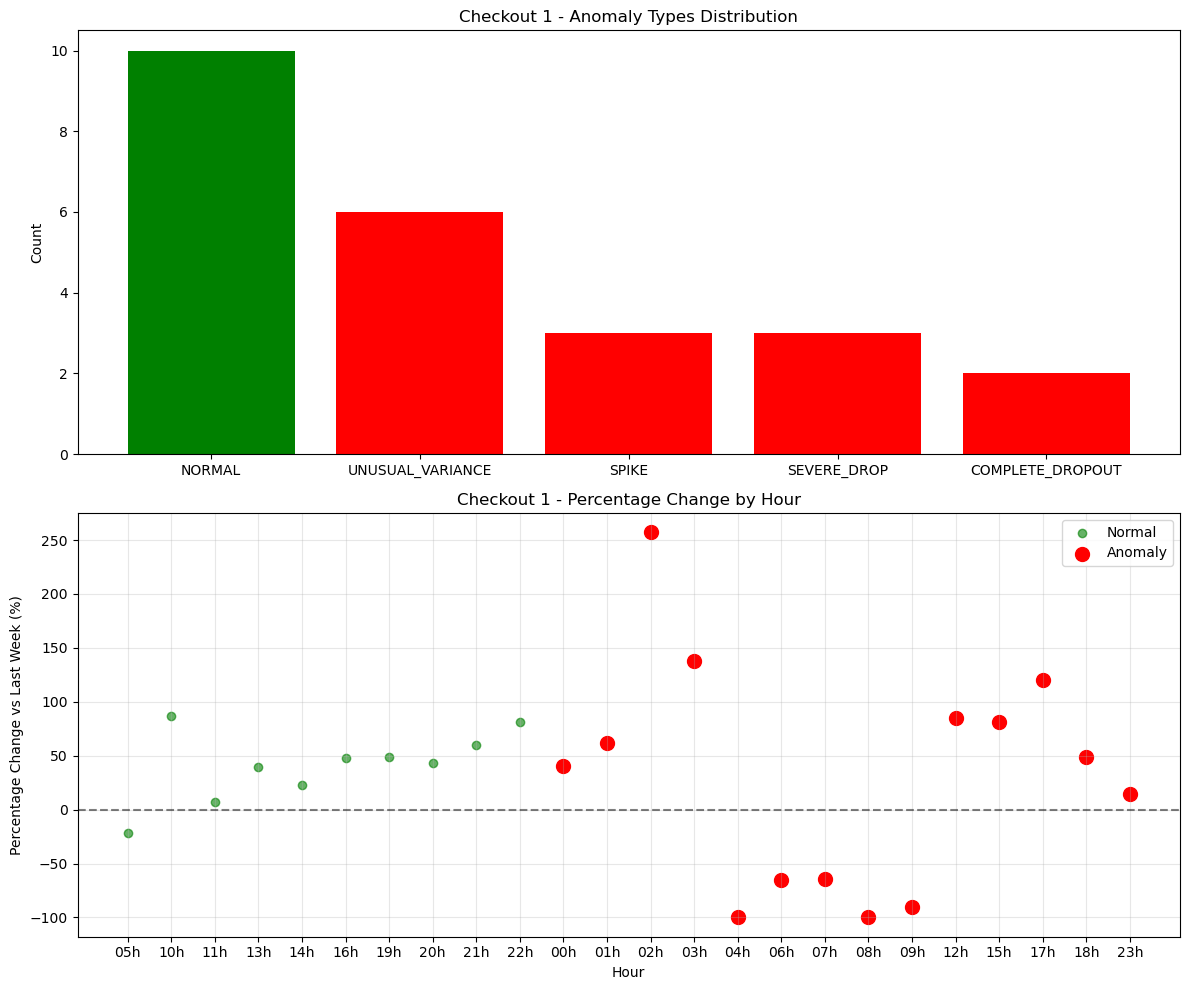

<Figure size 1200x800 with 0 Axes>

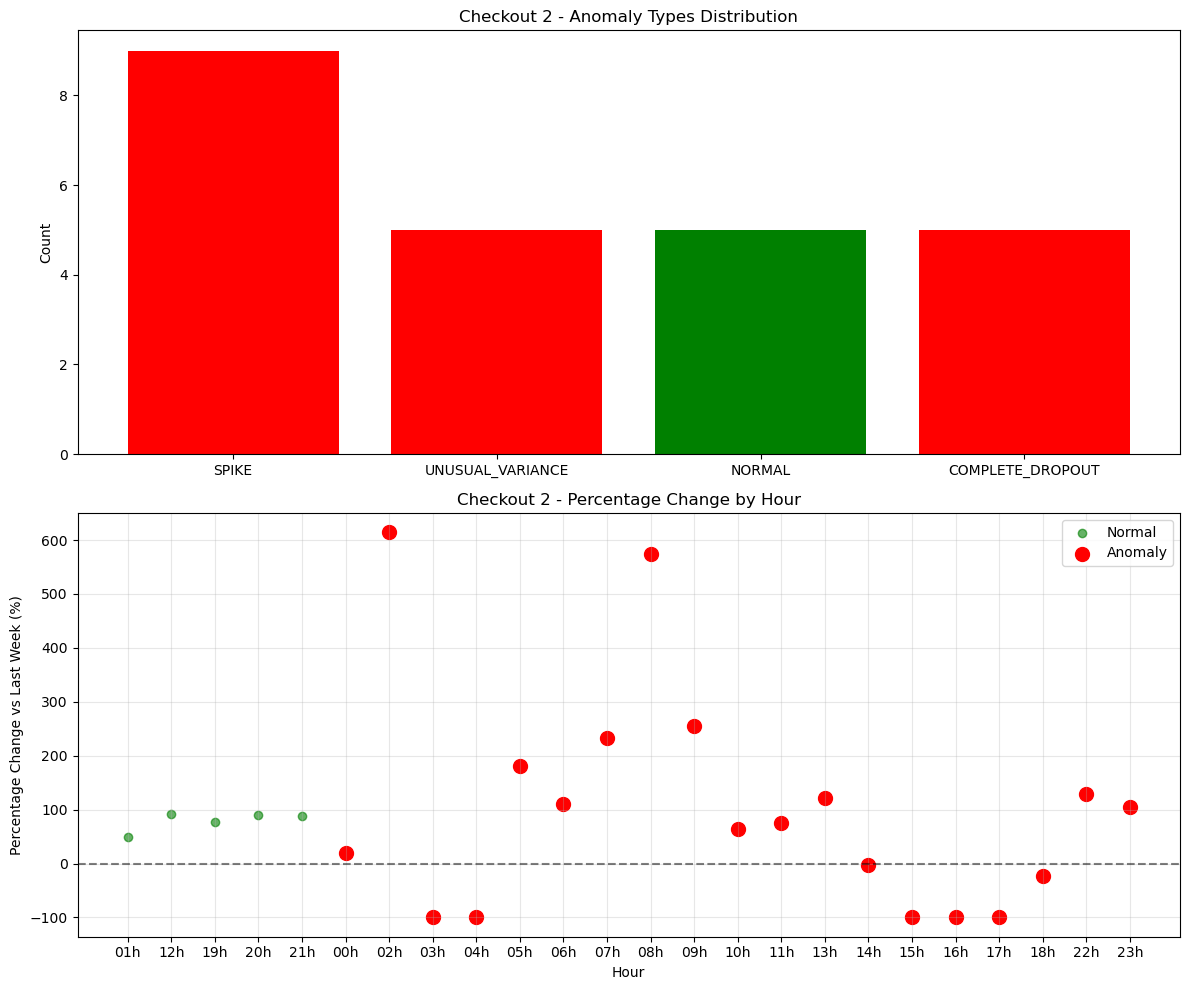

In [27]:
# Visualization: Anomaly Distribution
def plot_anomaly_distribution(df, title):
    plt.figure(figsize=(12, 8))
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot 1: Anomaly types by hour
    anomaly_counts = df['anomaly_type'].value_counts()
    colors = ['red' if x != 'NORMAL' else 'green' for x in anomaly_counts.index]
    ax1.bar(anomaly_counts.index, anomaly_counts.values, color=colors)
    ax1.set_title(f'{title} - Anomaly Types Distribution')
    ax1.set_ylabel('Count')

       # Plot 2: Percentage change over time
    normal_data = df[df['anomaly_type'] == 'NORMAL']
    anomaly_data = df[df['anomaly_type'] != 'NORMAL']
    
    ax2.scatter(normal_data['time'], normal_data['pct_change_vs_week'], 
                color='green', alpha=0.6, label='Normal')
    ax2.scatter(anomaly_data['time'], anomaly_data['pct_change_vs_week'], 
                color='red', s=100, label='Anomaly')
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax2.set_xlabel('Hour')
    ax2.set_ylabel('Percentage Change vs Last Week (%)')
    ax2.set_title(f'{title} - Percentage Change by Hour')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_anomaly_distribution(checkout1_anomalies, "Checkout 1")
plot_anomaly_distribution(checkout2_anomalies, "Checkout 2")

***Checkout 1 Analysis:***

**Bar chart:**

-> Normal = ~10 hours.

-> High UNUSUAL_VARIANCE and SPIKE counts.

-> Suggests demand was unstable and spiking.

**Scatter Plot:**

-> Steady mid-day % changes but drastic morning drops.

-> Peaks during 10–17h confirm SPIKE classification.

---------------------------------------------------------------------------------------------------------------------------------------------

***Checkout_2 Analysis***

**Bar Chart:**

-> More hours show SPIKE and COMPLETE_DROPOUT.

-> Consistency problems. 

**Scatter Plot:**

-> Several hours with 400–500% increase (massive spike)

-> Multiple hours with -100% (dropout), especially 15h–17h → system failure suspected.
    

In [29]:
def analyze_trends(df):
    df = df.copy()
    
    # Calculate lag values (previous hour)
    df['prev_hour'] = df['today'].shift(1)
    df['two_hours_ago'] = df['today'].shift(2)
    df['hourly_change'] = df['today'] - df['prev_hour']
    
    # Determine trend
    df['trend'] = 'STABLE'
    df.loc[df['today'] > df['prev_hour'], 'trend'] = 'INCREASING'
    df.loc[df['today'] < df['prev_hour'], 'trend'] = 'DECREASING'
    
    return df[['time', 'today', 'prev_hour', 'two_hours_ago', 'hourly_change', 'trend']]

# Apply to both datasets
checkout1_trends = analyze_trends(checkout1)
checkout2_trends = analyze_trends(checkout2)

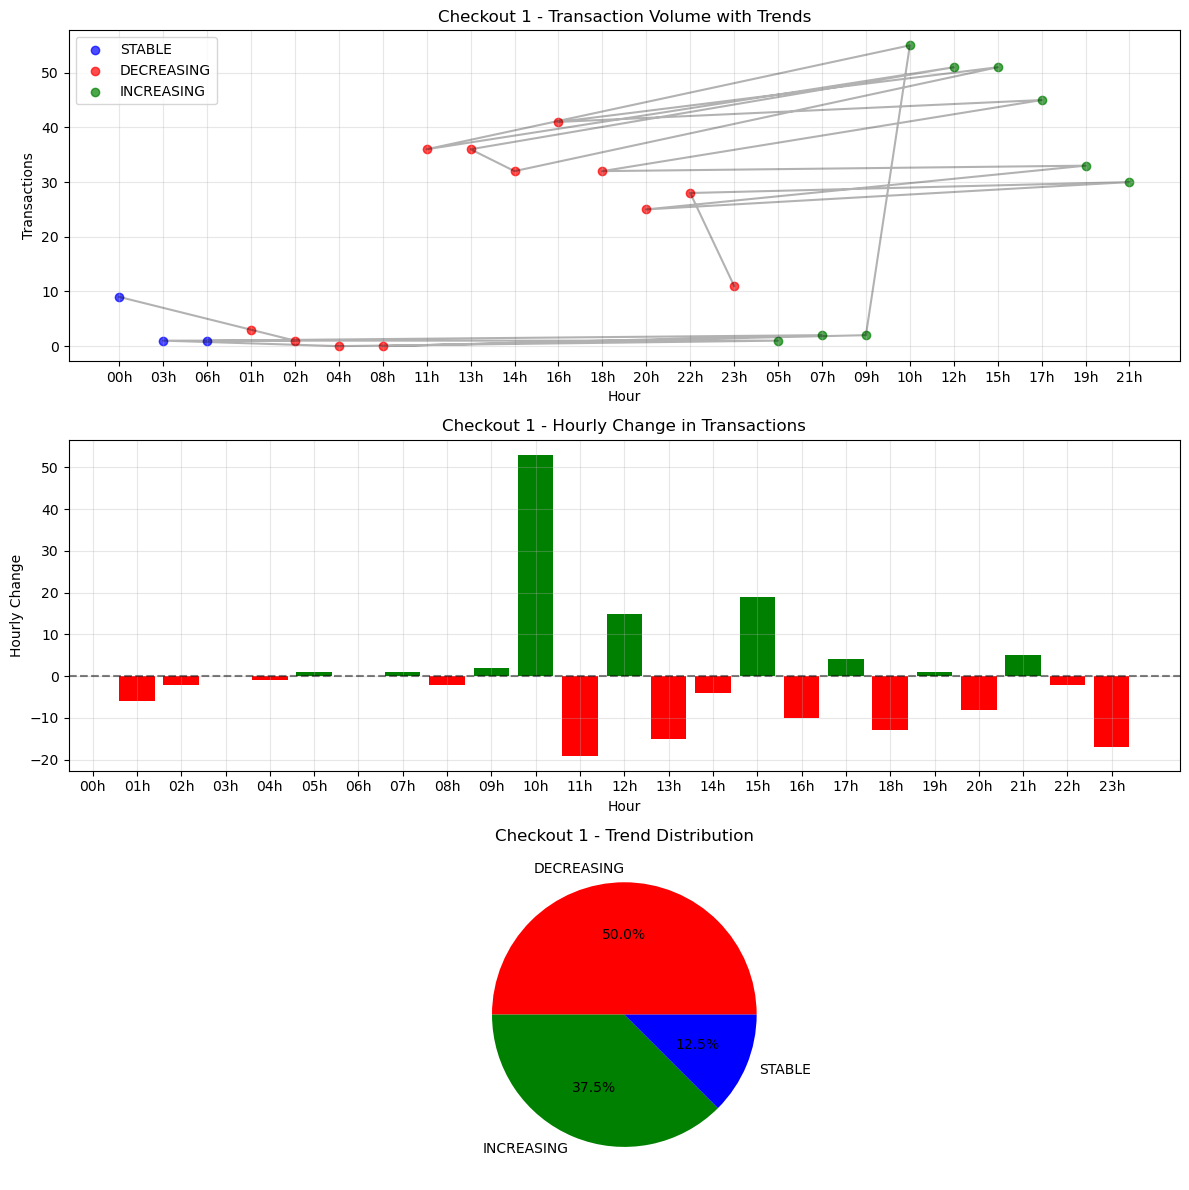

In [31]:
# Visualization: Trend Analysis
def plot_trend_analysis(df, title):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))
    
    # Plot 1: Transaction volume with trend indicators
    colors = {'INCREASING': 'green', 'DECREASING': 'red', 'STABLE': 'blue'}
    for trend in df['trend'].unique():
        trend_data = df[df['trend'] == trend]
        ax1.scatter(trend_data['time'], trend_data['today'], 
                   color=colors[trend], label=trend, alpha=0.7)
    
    ax1.plot(df['time'], df['today'], 'k-', alpha=0.3)
    ax1.set_xlabel('Hour')
    ax1.set_ylabel('Transactions')
    ax1.set_title(f'{title} - Transaction Volume with Trends')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Hourly change
    ax2.bar(df['time'], df['hourly_change'], 
            color=['green' if x > 0 else 'red' if x < 0 else 'gray' for x in df['hourly_change']])
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax2.set_xlabel('Hour')
    ax2.set_ylabel('Hourly Change')
    ax2.set_title(f'{title} - Hourly Change in Transactions')
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Trend distribution
    trend_counts = df['trend'].value_counts()
    ax3.pie(trend_counts.values, labels=trend_counts.index, autopct='%1.1f%%', 
            colors=[colors[x] for x in trend_counts.index])
    ax3.set_title(f'{title} - Trend Distribution')
    
    plt.tight_layout()
    plt.show()

plot_trend_analysis(checkout1_trends, "Checkout 1")

***Checkout 1 : Trend Analysis***

**Plot 1:**

-> Night hours (00h–06h) show low and STABLE or slightly DECREASING trends.

-> Massive rise after 10h — sudden jump to 55 transactions.

-> This sharp transition shows surging activity, likely a planned campaign, external trigger, or customer behavior spike.

**Plot 2: Hourly Change**

-> 10h shows the largest positive jump (over +40 transactions in one hour!).

-> But 16h–23h sees a string of negative bars = sales are dropping hourly.

-> Suggests end-of-day slump or possible system fatigue (infra slowing down?).

**Plot 3: Trend Distribution**

-> 50% of hours are DECREASING.

-> Only ~37.5% are INCREASING.

-> Few hours are STABLE.

→ This volatile pattern signals poor retention of peak hours — sales spike fast, but can't sustain.

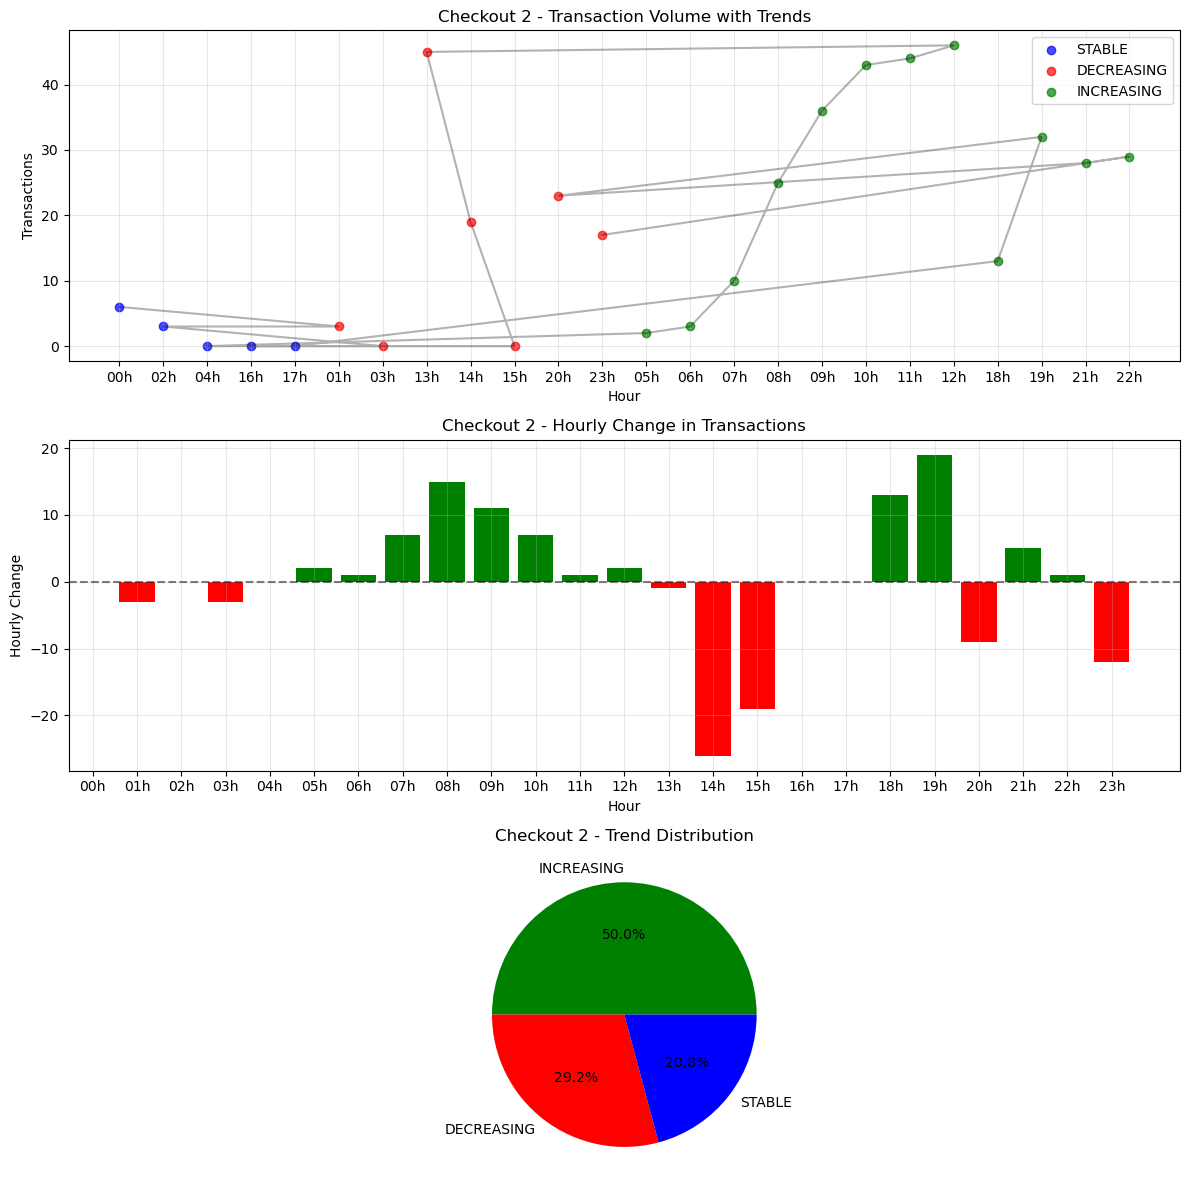

In [32]:
plot_trend_analysis(checkout2_trends, "Checkout 2")

***Checkout 2 : Trend Analysis***

**Plot 1:**

-> (00h–06h) = low volume, mostly STABLE.

-> Sustained INCREASE from 06h to 13h — strong growth momentum.

-> But post-13h, trend sinks again into sharp decline.

**Plot 2: Hourly Change**

-> 08h–11h show strong positive growth.

-> 14h–17h have deep negative drops, especially 15h (−20+)

**Plot 3: Trend Distribution**

-> 50% of hours are INCREASING = stronger than Checkout 1!

-> DECREASING share is slightly smaller.

Shows better morning-to-afternoon sales ramp-up than Checkout 1



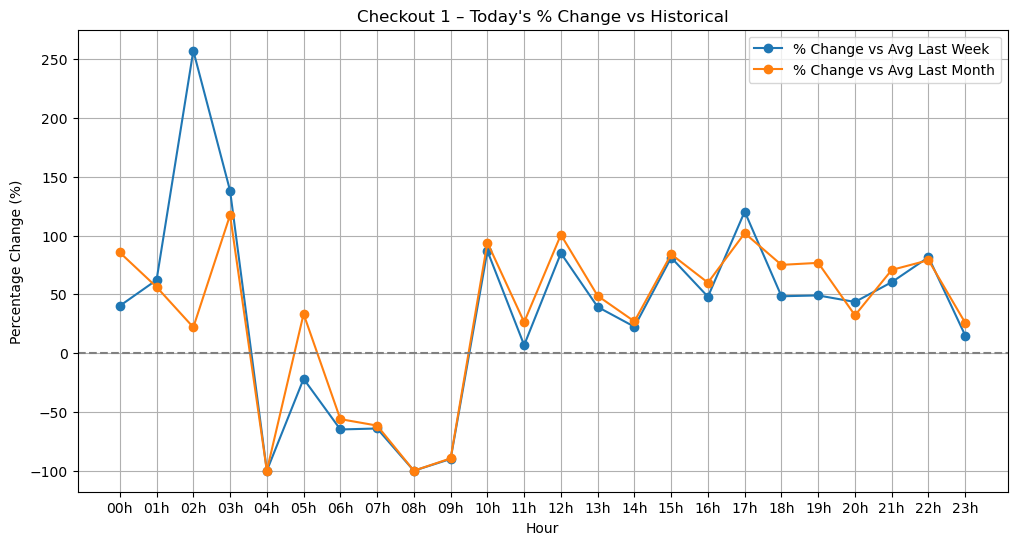

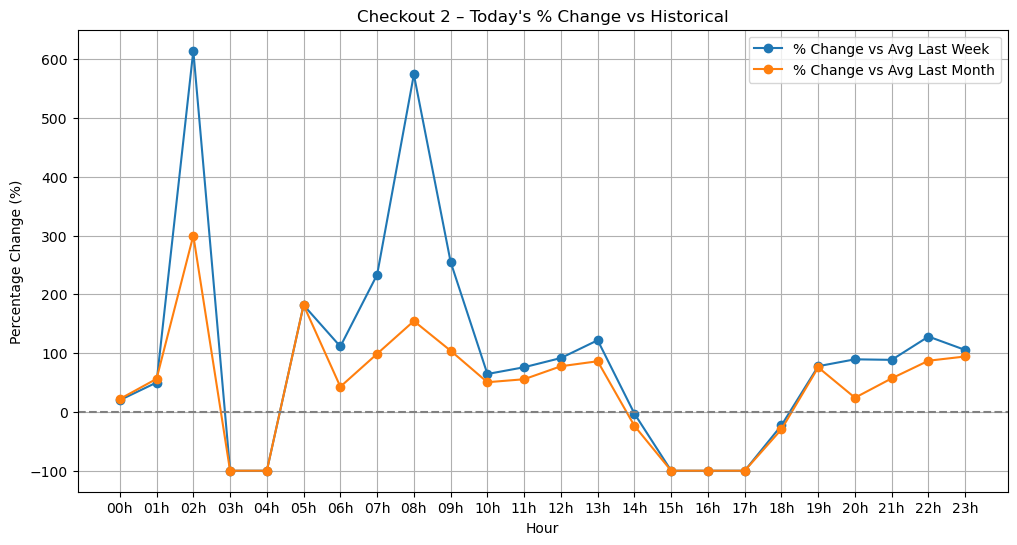

In [16]:
# Percentage change of 'today' vs. avg_last_week and avg_last_month
def plot_percentage_change(df, title):
    df = df.copy()
    df['pct_change_week'] = 100 * (df['today'] - df['avg_last_week']) / df['avg_last_week']
    df['pct_change_month'] = 100 * (df['today'] - df['avg_last_month']) / df['avg_last_month']
    plt.figure(figsize=(12,6))
    plt.plot(df['time'], df['pct_change_week'], marker='o', label='% Change vs Avg Last Week')
    plt.plot(df['time'], df['pct_change_month'], marker='o', label='% Change vs Avg Last Month')
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Hour')
    plt.ylabel('Percentage Change (%)')
    plt.title(title + " – Today's % Change vs Historical")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_percentage_change(checkout1, "Checkout 1")
plot_percentage_change(checkout2, "Checkout 2")

**Checkout 1 Performance:**

-> Peak deviations: +200-250% during low-volume hours (less concerning due to small absolute numbers)
->  +50-100% increases (significant positive impact)

**Checkout 2 Extreme Variations:**

-> +500-600% increases (system anomalies)
-> -100% drops (service outages)

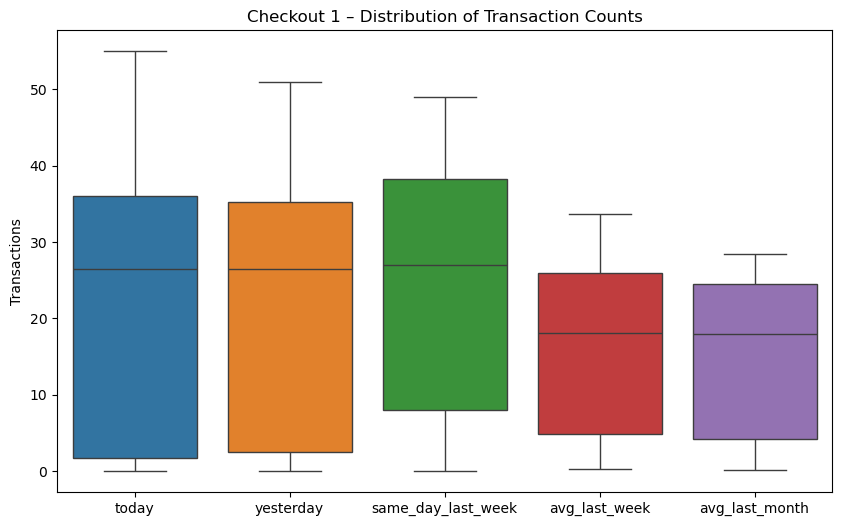

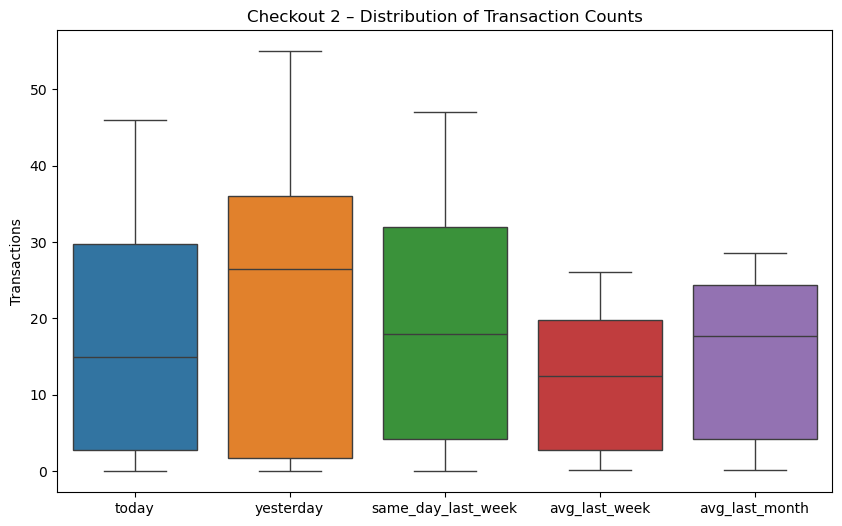

In [17]:
def plot_boxplots(df, title):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df.drop(columns=['time']))
    plt.title(title + " – Distribution of Transaction Counts")
    plt.ylabel('Transactions')
    plt.show()

plot_boxplots(checkout1, "Checkout 1")
plot_boxplots(checkout2, "Checkout 2")

**Used this to Understand the spread, central tendency, and outliers in transaction patterns.**

**Checkout 1 Distribution:**

-> Similar distributions across all time periods

-> Few extreme values within expected ranges

-> Predictable variance patterns

**Checkout 2 Distribution:**

-> More unpredictable transaction patterns

-> Lower performance: Today's median below historical averages

-> System concerns: Irregular distribution patterns

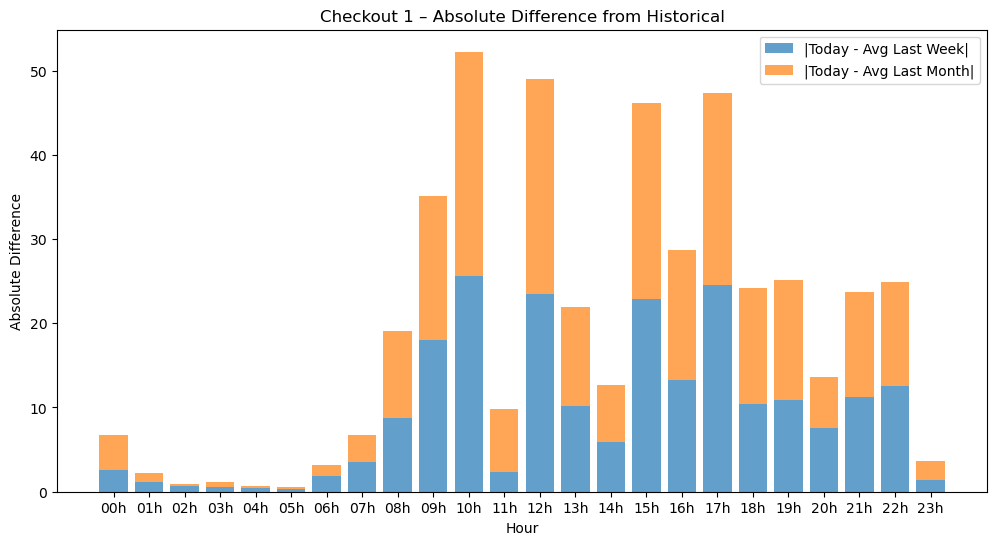

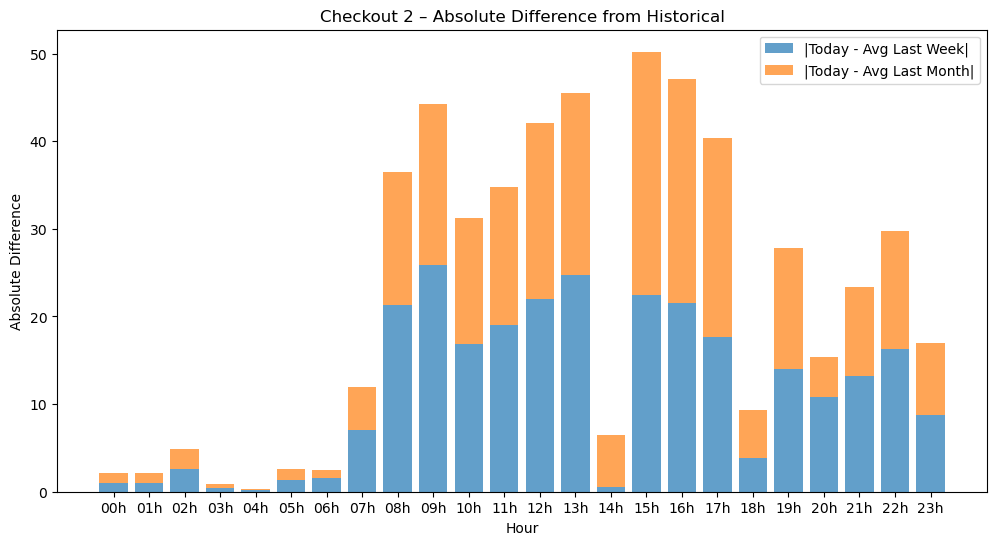

In [19]:
def plot_abs_diff(df, title):
    df = df.copy()
    df['abs_diff_week'] = (df['today'] - df['avg_last_week']).abs()
    df['abs_diff_month'] = (df['today'] - df['avg_last_month']).abs()
    plt.figure(figsize=(12,6))
    plt.bar(df['time'], df['abs_diff_week'], alpha=0.7, label='|Today - Avg Last Week|')
    plt.bar(df['time'], df['abs_diff_month'], alpha=0.7, label='|Today - Avg Last Month|', bottom=df['abs_diff_week'])
    plt.xlabel('Hour')
    plt.ylabel('Absolute Difference')
    plt.title(title + " – Absolute Difference from Historical")
    plt.legend()
    plt.show()

plot_abs_diff(checkout1, "Checkout 1")
plot_abs_diff(checkout2, "Checkout 2")

**Used this to Quantify the actual business impact of deviations regardless of percentage changes.**

**Checkout 1:** Consistent 10-30 transaction differences during peak hours (manageable)

**Checkout 2:** Extreme 40-50 transaction differences (significant business impact)

## INSIGHTS
**Checkout 1**

-> Consistent positive anomalies during business hours

-> Predictable patterns with manageable variance

-> Strong correlation between historical and current performance

**Checkout 2**

-> Service disruptions during peak revenue hours (15h-17h)

-> Erratic performance patterns indicating technical problems

-> Disconnected from historical performance patterns

-> Requires immediate technical intervention and investigation




## RECOMMENDATIONS

-> Investigate Checkout 2's complete service failure (15h-17h)

-> Examine Checkout 2's system stability issues

-> Study Checkout 1's success factors for system-wide implementation

-> Predictive Analytics: Use historical patterns to forecast expected ranges